# **Instacart Basket Analysis 2024 - Part 1**

## **This Script Contains the Following Points:**
#### 1. Importing Libraries & Data
#### 2. Security Implications
#### 3. Regional Segmentation of Data
#### 4. Exclusion of Low-Activity Customers
#### 5. Customer Profiling by Age
#### 6. Customer Profiling by Income
#### 7. Customer Profiling by Dependants
#### 8. Match Department_id with Appropriate Department Name
#### 9. Customer Profiling Based on Departments
#### 10. Customer Profile Level Aggregations for Usage Frequency and Expenditure
#### 11. Customer Comparisons
#### 12. Export Dataset

### 1. Importing Libraries & Data

In [6]:
#import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [7]:
#create folder path to Instacart dataset
path = r'/Users/kimkmiz/Documents/Instacart Basket Analysis 2024'

In [8]:
#importing Instacart dataset
df = pd.read_pickle(os.path.join(path, '02 Data', 'IC24 Prepared Data', 'instacart_combined.pkl'))

In [9]:
#check dataset
df.head(5)

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,number_of_dependants,marital_status,income,...,reordered,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,0,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,0,Low-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,Low-range product,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


### 2. Security Implications

The dataframe includes personally identifiable information in the following columns:
- 'First Name'
- 'Surnam'

In [12]:
#Drop 'First Name' and 'Surnam' columns from dataframe
df.drop(['First Name', 'Surnam'], axis=1, inplace=True)

In [13]:
#Check updated dataframe, without PII columns
df.head(5)

,user_id,Gender,STATE,Age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,reordered,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,0,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,1,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,1,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,0,Low-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,1,Low-range product,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [14]:
#Successfully removed 'First Name' and 'Surnam' columns

### 3. Regional Segmentation of Data

In [16]:
#Create a regional segmentation of the data.
#Create a 'Region' column based on the “STATE” column from dataframe

In [17]:
#Create Northeast Region List
Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

#Create Midwest Region List
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

#Create South Region List
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

#Create West Region List
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']


In [18]:
#Create columns for each region list

#Creating Column for Northeast
df.loc[df['STATE'].isin(Northeast),'region']='Northeast'

#Creating Column for Midwest
df.loc[df['STATE'].isin(Midwest),'region']='Midwest'

#Creating Column for South
df.loc[df['STATE'].isin(South),'region']='South'

#Creating Column for West
df.loc[df['STATE'].isin(West),'region']='West'

In [19]:
#Check for Region Column
df.head(5)

,user_id,Gender,STATE,Age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest


In [20]:
#Region column successfully added

In [21]:
#check frequency of region column
#Get counts for each unique item in the 'region' column
region_counts = df['region'].value_counts()

print(region_counts)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64


In [22]:
#Create crosstab between 'spending_flag' and 'region' columns
spending_habits_by_region=pd.crosstab(df['region'],df['spending_flag'],dropna=False)

In [23]:
#Print crosstab
spending_habits_by_region

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40564,10751321
West,31223,8261690


Text(0.5, 1.0, 'Spending Habits by Region')

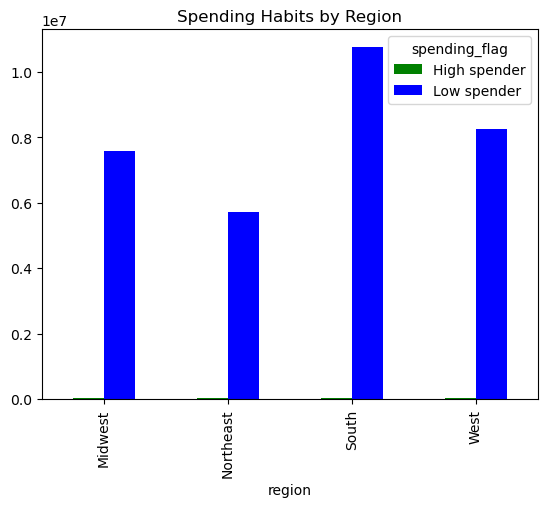

In [24]:
#Create bar chart of spending_habits_by_region crosstab
bar_spending_habits_by_region=spending_habits_by_region.plot.bar(color=['green','blue'])
# Add a title
plt.title('Spending Habits by Region')

**Observations:**

- All regions show that majority of customers are low spenders
- The most low spenders are in the South region
- The least low spenders are in the Northeast region
- All regions have extremely low amounts of high spenders in comparison to their low spenders

In [26]:
#Export bar chart to Visualizations folder
bar_spending_habits_by_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_spending_habits_by_region.png'))

In [27]:
#Create crosstab between 'order_frequency' and 'region' columns 
order_frequency_by_region_crosstab=pd.crosstab(df['region'],df['order_frequency'],dropna=False)

In [28]:
#print crosstab
order_frequency_by_region_crosstab

order_frequency,Frequent customer,Non-frequent customer,Regular customer,NaN
region,,,,
Midwest,5017709,863419,1716197,0
Northeast,3804566,630182,1287988,0
South,7192372,1215088,2384420,5
West,5545206,927748,1819959,0


In [29]:
#View missing values in order_frequency column
df.loc[df['order_frequency'].isnull()]

,user_id,Gender,STATE,Age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,region
18509448,159838,Male,Arkansas,63,11/9/2018,3,married,140994,10749,Organic Red Bell Pepper,...,Mid-range product,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,NaN,South
18509449,159838,Male,Arkansas,63,11/9/2018,3,married,140994,21334,Organic Peeled Garlic,...,Mid-range product,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,NaN,South
18509450,159838,Male,Arkansas,63,11/9/2018,3,married,140994,22198,4X Ultra Concentrated Natural Laundry Detergen...,...,Low-range product,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,NaN,South
18509451,159838,Male,Arkansas,63,11/9/2018,3,married,140994,23695,California Veggie Burger,...,Low-range product,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,NaN,South
18509452,159838,Male,Arkansas,63,11/9/2018,3,married,140994,33401,Goat Cheese Crumbles,...,Mid-range product,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,NaN,South


In [30]:
#These are all new customers, so they appear as missing in the order_frequency column because they only have 1 first order.

Text(0.5, 1.0, 'Customer Order Frequency by Region')

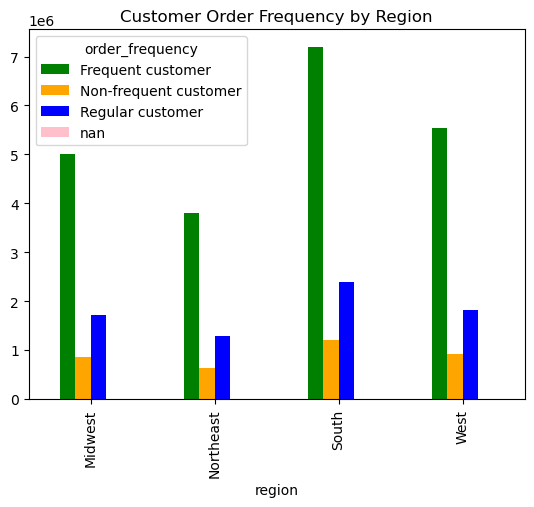

In [31]:
#Create bar chart of order_frequency_by_region_crosstab
bar_order_frequency_by_region= order_frequency_by_region_crosstab.plot.bar(color=['green','orange','blue','pink'])
# Add a title
plt.title('Customer Order Frequency by Region')

In [32]:
#Export bar chart to Visualizations folder
bar_order_frequency_by_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_order_frequency_by_region.png'))

**Observations:**
Non-Frequent Customer: The median days between orders is greater than 20 days
Regular Customer: The median days between orders is between 11 and 20 days
Frequent Customer: The median days between orders is 10 or fewer days

- The South has the most frequent, most regular and most non-frequent customers
- The Midwest and West are close in terms of frequent customers
- The Northeast as the least amount of frequent customers
- Non-frequent customers are relatively close amongst the regions, with the South having the most non-frequent

### 4. Exclusion of Low-Activity Customers

In [35]:
#Create exclusion flag for high-activity customers
df.loc[df['max_order']>=5,'customer_activity_flag']='High Activity'

#Create exclusion flag for low-activity customers
df.loc[df['max_order']<5,'customer_activity_flag']='Low Activity'

In [36]:
#Check exclusion flag
df.head(5)

,user_id,Gender,STATE,Age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,region,customer_activity_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High Activity
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High Activity
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High Activity
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High Activity
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High Activity


In [37]:
#Customer_Activity_flag column appears in dataframe successfully

In [38]:
#Check frequency of new customer activity flag column
df['customer_activity_flag'].value_counts(dropna=False)

customer_activity_flag
High Activity    30964564
Low Activity      1440295
Name: count, dtype: int64

In [39]:
#Create separate dataframe for 'High Activity' customers, exluding the 'Low Activity' customers
df_high_activity=df[df['customer_activity_flag']=='High Activity']

#Check df_high_activity output
df_high_activity.shape

(30964564, 31)

In [40]:
#the total matches the total in the frequency count from line 83

#Export df_high_activity dataframe
df_high_activity.to_pickle(os.path.join(path,'02 Data','IC24 Prepared Data','instacart_combined_high_activity.pkl'))

In [41]:
#Export updated dataframe that does not exclue low activity customers
df.to_pickle(os.path.join(path,'02 Data','IC24 Prepared Data','instacart_combined_customer_activity.pkl'))

### 5. Customer Profiling

In [43]:
#Create 'Age Group' columns to flag for 'Young Adult', 'Middle Age', or 'Senior'

#Create young adult group
df.loc[df['Age']<=30, 'age_group']= 'Young Adult'

#Create middle age group
df.loc[(df['Age']>30)&(df['Age']<=60),'age_group']='Middle Age'

#Create senior group
df.loc[df['Age']>60, 'age_group']= 'Senior'

In [44]:
#Check frequency
df['age_group'].value_counts(dropna=False)

age_group
Middle Age     15222661
Senior         10582839
Young Adult     6599359
Name: count, dtype: int64

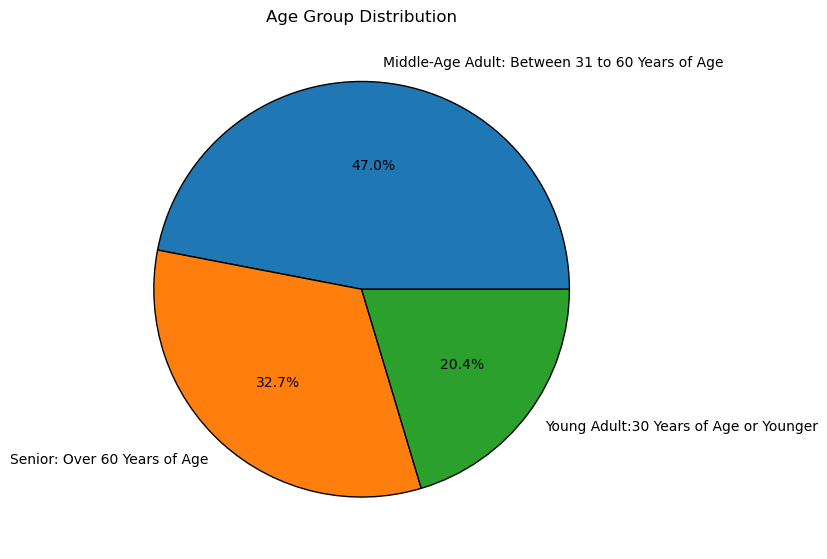

In [45]:
#Create pie chart of the age groups

age_group_counts = df['age_group'].value_counts()
plt.figure(figsize=(8,8))
age_group_pie_chart=age_group_counts.plot.pie(labels=('Middle-Age Adult: Between 31 to 60 Years of Age','Senior: Over 60 Years of Age','Young Adult:30 Years of Age or Younger'), 
                          autopct='%.1f%%',
                          wedgeprops={'edgecolor':'black'})
plt.title('Age Group Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Observations:**

- The majority of Instacart customers fall within the Middle Age group
- Seniors make up the second-largest group
- Young Adults make up the smallest portion of Instacart customers

**Notes for Further Analysis:**

- Young Adults may not make as much money. 
- Middle Age customers may be using Instacart to support families, or dependants.
- Young Adults may not need as much groceries, if not married and do not have dependents.

In [47]:
#Export pie chart
age_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_group_distribution_pie_chart.png'))

### 6. Customer Profiling by Income

In [49]:
#Print income statistics
df['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

Text(0.5, 1.0, 'Customer Income Levels')

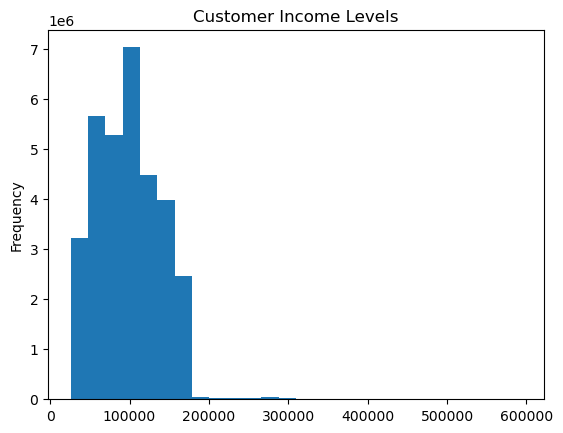

In [50]:
#Create histogram of income column, use 26 as bin, assuming 26 biweekly pay periods per year
df['income'].plot.hist(bins=26)
# Add a title
plt.title('Customer Income Levels')

In [51]:
#Create income level groups

#Create low income group for incomes less than or equal to $65,000
df.loc[df['income']<=65000,'income_level']='Low Income'

#Create middle income group for incomes greater than $65,000 and less than or equal to $130,000
df.loc[df['income']>65000 & (df['income']<= 1300000), 'income_level']='Middle Income'

#Create high income group for incomes greater than $130,000
df.loc[df['income']>130000, 'income_level'] = 'High Income'

In [52]:
#Check Frequency
df['income_level'].value_counts()

income_level
Middle Income    24691331
High Income       7713528
Name: count, dtype: int64

In [53]:
#Low Income group not appearing. Will retype below ensuring no typing errrors.

# Create income level groups
# Create low income group for incomes less than or equal to $65,000
df.loc[df['income'] <= 65000, 'income_level'] = 'Low Income'

# Create middle income group for incomes greater than $65,000 and less than or equal to $130,000
df.loc[(df['income'] > 65000) & (df['income'] <= 130000), 'income_level'] = 'Middle Income'

# Create high income group for incomes greater than $130,000
df.loc[df['income'] > 130000, 'income_level'] = 'High Income'

# Print the frequency for each income level group
frequency = df['income_level'].value_counts()
print(frequency)

income_level
Middle Income    17170138
High Income       7713528
Low Income        7521193
Name: count, dtype: int64


In [54]:
#Low Income group now appears, coded groups income level successfully

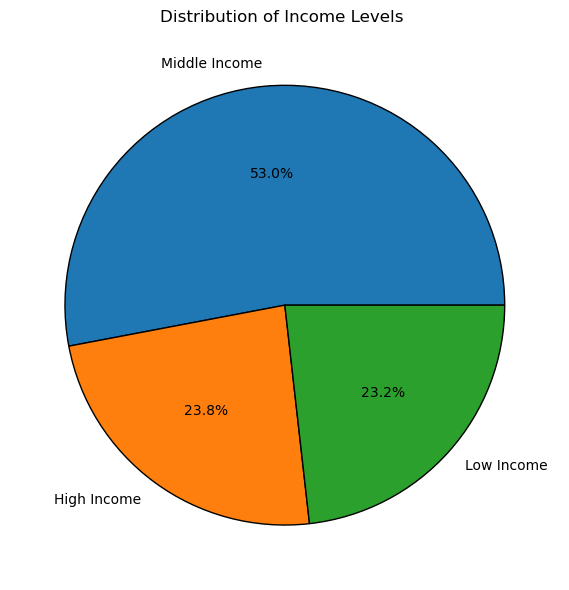

In [55]:
#Create pie chart of income levels
income_level_counts = df['income_level'].value_counts()
plt.figure(figsize=(6,6))
income_level_pie_chart=income_level_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Distribution of Income Levels ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [56]:
#Export Income Level Pie Chart
income_level_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_levels_pie.png'))

**Observations:**

- Majority of customers are within the Middle Income level
- The High Income level accounts for slightly more of the customers than Low Income level

### 7. Customer Profiling by Dependants

In [59]:
#print statistics of dependents
df['number_of_dependants'].describe()

count    3.240486e+07
mean     1.501896e+00
std      1.118865e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_of_dependants, dtype: float64

In [60]:
#Create groups based on dependants

#Create 'dependants' group for any value over 0
df.loc[df['number_of_dependants'] > 0, 'dependants_status'] = 'has dependants'

#Create 'no dependants' group for values less than 1
df.loc[df['number_of_dependants'] <= 0, 'dependants_status'] = 'no dependants'

In [61]:
#check frequency
df['dependants_status'].value_counts(dropna=False)

dependants_status
has dependants    24307356
no dependants      8097503
Name: count, dtype: int64

Text(0.5, 1.0, 'Dependants Status')

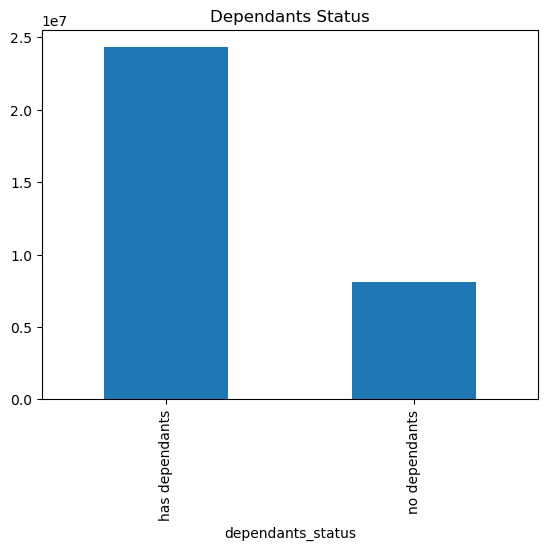

In [62]:
#create bar chart
dependants_status_bar=df['dependants_status'].value_counts().plot.bar()
# Add a title
plt.title('Dependants Status')

In [63]:
#Export Dependants Groups Bar Chart
dependants_status_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dependants_status_bar.png'))

Text(0.5, 1.0, 'Dependants Status Distribution')

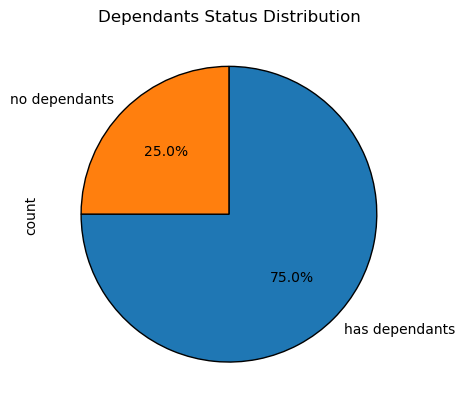

In [64]:
#create pie chart
dependants_status_pie=df['dependants_status'].value_counts().plot.pie(
    autopct='%1.1f%%',  
    startangle=90,     
    counterclock=False, 
    labels=df['dependants_status'].value_counts().index, 
    wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Dependants Status Distribution')

In [65]:
#Export Dependants Groups Pie Chart
dependants_status_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dependants_status_pie.png'))

### 8. Match Department_id with Appropriate Department Name

In [67]:
#Import names of departments
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'IC24 Prepared Data', 'departments_wrangled.csv'))

In [68]:
#print names of departments
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [69]:
#Create data dictionary

zipped=zip(df_dept['department_id'], df_dept['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [70]:
#Match department names with appropriate department_id in dataframe

df['department'] = df['department_id'].map(data_dict)

In [71]:
#Check output
df.head(5)

,user_id,Gender,STATE,Age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,mean_product_price,spending_flag,median_days_between_orders,order_frequency,region,customer_activity_flag,age_group,income_level,dependants_status,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,7.988889,Low spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,has dependants,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,7.988889,Low spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,has dependants,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,7.988889,Low spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,has dependants,beverages
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,7.988889,Low spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,has dependants,produce
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,7.988889,Low spender,19.0,Regular customer,Midwest,High Activity,Middle Age,High Income,has dependants,produce


In [72]:
#Department column added successfully

In [73]:
df['department'].value_counts()

department
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

### 9. Customer Profiling Based on Departments

In [75]:
#Create crosstab of department and age_group
department_by_age_crosstab=pd.crosstab(df['department'], df['age_group'], dropna=False)

In [76]:
#check output
department_by_age_crosstab

age_group,Middle Age,Senior,Young Adult
department,,,
alcohol,72768,48533,32395
babies,199807,137024,86971
bakery,551338,382711,238379
beverages,1262242,883000,542881
breakfast,330643,228137,144253
bulk,16116,11291,7166
canned goods,500302,347829,219927
dairy eggs,2537338,1760012,1101397
deli,493460,344391,213398


Text(0.5, 1.0, 'Department Sales by Age Group')

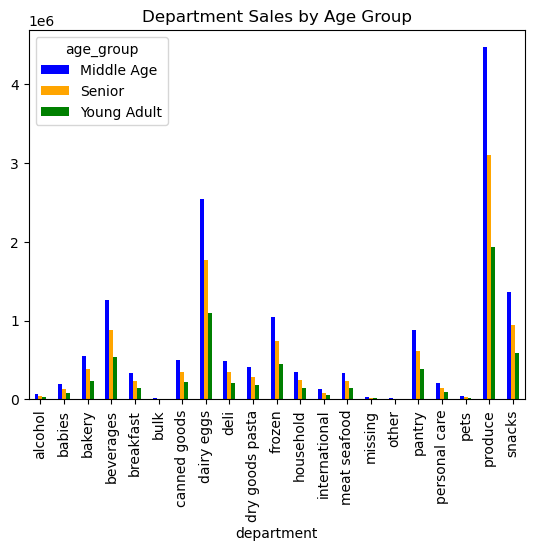

In [77]:
#Create bar chart of departments by age group
departments_by_age_bar = department_by_age_crosstab.plot.bar(color=['blue', 'orange', 'green'])
# Add a title
plt.title('Department Sales by Age Group')

**Observations:**

- Across all age groups, 'produce' is most popular
- Across all age groups, 'dairy eggs' is second most popular
- 'Snacks' and 'beverages' are moderately popular amongst all age groups
- Across all age groups, 'bulk' is the least popular department
- Based on this chart, the top selling departments are: Produce, Dairy Eggs, Snacks, and Beverages amongst all customer age groups.

In [79]:
#Export departments by age groups Bar Chart
departments_by_age_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','departments_by_age_bar.png'))

In [80]:
#create crosstab of department_id and income_level
departments_by_income_level_crosstab=pd.crosstab(df['department'], df['income_level'], dropna=False)

In [81]:
#check output
departments_by_income_level_crosstab

income_level,High Income,Low Income,Middle Income
department,,,
alcohol,41241,37371,75084
babies,105097,77197,241508
bakery,288754,255822,627852
beverages,613891,731104,1343128
breakfast,162424,184191,356418
bulk,7552,9133,17888
canned goods,266525,215224,586309
dairy eggs,1307701,1182757,2908289
deli,250698,240958,559593


Text(0.5, 1.0, 'Department Sales by Income Level')

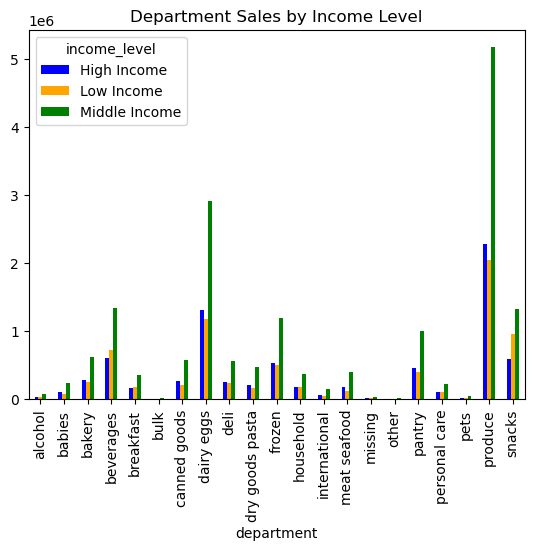

In [82]:
#create bar chart of department_ids by income level 
departments_by_income_level_bar = departments_by_income_level_crosstab.plot.bar(color=['blue', 'orange', 'green'])
# Add a title
plt.title('Department Sales by Income Level')

**Observations:**
- 'Produce', 'dairy eggs', 'beverages', 'snacks', and 'frozen' are the most popular departments regardless of income level.

In [84]:
#Export Departments by income_level bar
departments_by_income_level_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','departments_by_income_level_bar.png'))

In [85]:
#create crosstab of department and dependants_status
departments_by_dependants_status_crosstab=pd.crosstab(df['department'], df['dependants_status'], dropna=False)

In [86]:
departments_by_dependants_status_crosstab

dependants_status,has dependants,no dependants
department,,
alcohol,114578,39118
babies,317308,106494
bakery,878023,294405
beverages,2013681,674442
breakfast,528456,174577
bulk,26295,8278
canned goods,803220,264838
dairy eggs,4049385,1349362
deli,786104,265145


Text(0.5, 1.0, 'Department Sales by Dependants Status')

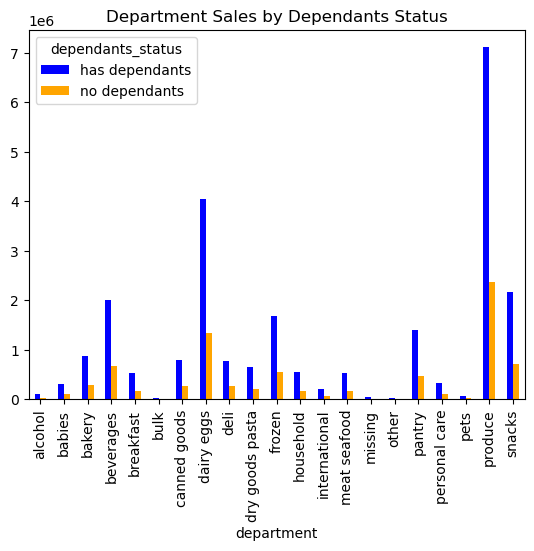

In [87]:
#create bar chart of departments by dependants_status 
departments_by_dependants_status_bar = departments_by_dependants_status_crosstab.plot.bar(color=['blue', 'orange'])
# Add a title
plt.title('Department Sales by Dependants Status')

**Observations:**

- The same 5 departments are most popular amongst those that have dependants and those that do not
- For the produce department those with dependants account for more than half of produce sales
- For the dairy eggs department those with dependants account for more than half of sales

In [89]:
#Export Departments by dependants_status bar
departments_by_dependants_status_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','departments_by_dependants_status_bar.png'))

## 10. Customer Profile Level Aggregations for Usage Frequency and Expenditure

In [91]:
#Group columns and aggegrate the sum of prices
#Show user's age, income level, dependant status, region, type of loyalty, type of spender, level of activity, and sum of prices
profile_agg = df.groupby(['user_id', 'age_group', 'income_level', 'dependants_status', 'region', 'loyalty_flag', 'spending_flag', 'customer_activity_flag'])['prices'].sum().reset_index()

In [92]:
#check output
profile_agg.head()

,user_id,age_group,income_level,dependants_status,region,loyalty_flag,spending_flag,customer_activity_flag,prices
0,1,Middle Age,Low Income,has dependants,South,New customer,Low spender,High Activity,375.7
1,2,Senior,Low Income,has dependants,West,Regular customer,Low spender,High Activity,1465.6
2,3,Middle Age,Middle Income,has dependants,West,Regular customer,Low spender,High Activity,721.4
3,4,Middle Age,Low Income,has dependants,South,New customer,Low spender,High Activity,147.7
4,5,Senior,Middle Income,no dependants,West,New customer,Low spender,Low Activity,340.0


In [93]:
#Show user usage by calculating the mean, min and max values of days since prior order, order day of week, order hour of the day, and prices for each user
user_agg=df.groupby('user_id').agg({'days_since_prior_order': ['mean', 'min', 'max'],
                                        'order_day_of_week': ['mean', 'min', 'max'],'order_hour_of_day': ['mean', 'min', 'max'],
                                        'prices': ['mean', 'min', 'max'],})

In [94]:
#Check output
user_agg.head()

days_since_prior_order             order_day_of_week          \
                          mean   min   max              mean min max   
user_id                                                                
1                    20.259259   0.0  30.0          2.644068   1   4   
2                    15.967033   3.0  30.0          2.005128   1   5   
3                    11.487179   7.0  21.0          1.011364   0   3   
4                    15.357143   0.0  21.0          4.722222   4   6   
5                    14.500000  10.0  19.0          1.621622   0   3   

        order_hour_of_day            prices             
                     mean min max      mean  min   max  
user_id                                                 
1               10.542373   7  16  6.367797  1.0  14.0  
2               10.441026   9  15  7.515897  1.3  14.8  
3               16.352273  14  19  8.197727  1.3  14.4  
4               13.111111  11  15  8.205556  1.4  14.6  
5               15.729730  12  18  9.189189  3.2  14.8

### 11. Customer Comparisons

In [96]:
#Compare age group with income level
#Create Crosstab
income_age_crosstab=pd.crosstab(df['income_level'], df['age_group'], dropna=False)

In [97]:
#print crosstab
income_age_crosstab

age_group,Middle Age,Senior,Young Adult
income_level,,,
High Income,3766278,3875898,71352
Low Income,3433260,1310131,2777802
Middle Income,8023123,5396810,3750205


Text(0.5, 1.0, 'Income Levels by Age Group')

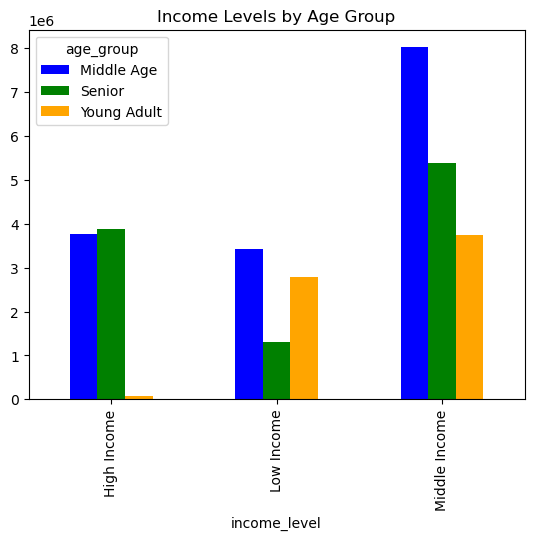

In [98]:
#Create bar chart of crosstab
bar_income_age=income_age_crosstab.plot.bar(color=['blue', 'green', 'orange'])
# Add a title
plt.title('Income Levels by Age Group')

In [99]:
#Switching the x and y axis for easier readability
#Transpose the crosstab DataFrame to switch columns and rows
income_age_crosstab_transposed = income_age_crosstab.T

Text(0.5, 1.0, 'Income Levels by Age Group')

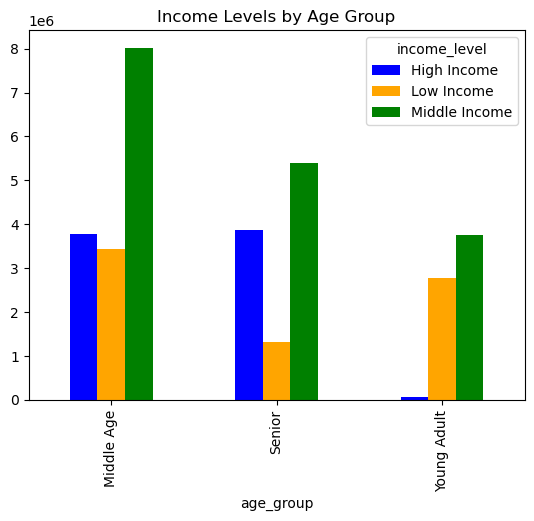

In [100]:
#Create the bar chart with the transposed DataFrame
#change colors so that blue and green are not side by side for easier readability
bar_income_age = income_age_crosstab_transposed.plot.bar(color=['blue', 'orange', 'green'])
plt.title('Income Levels by Age Group')

In [101]:
#Export income levels by age group bar chart
bar_income_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_by_age_group_bar.png'))

In [102]:
#compare age groups and dependents by creating crosstab
#create crosstab
dependants_by_age_group=pd.crosstab(df['age_group'], df['dependants_status'],dropna = False)

In [103]:
#check crosstab
dependants_by_age_group

dependants_status,has dependants,no dependants
age_group,,
Middle Age,11424038,3798623
Senior,7928248,2654591
Young Adult,4955070,1644289


Text(0.5, 1.0, 'Dependants Status by Age Group')

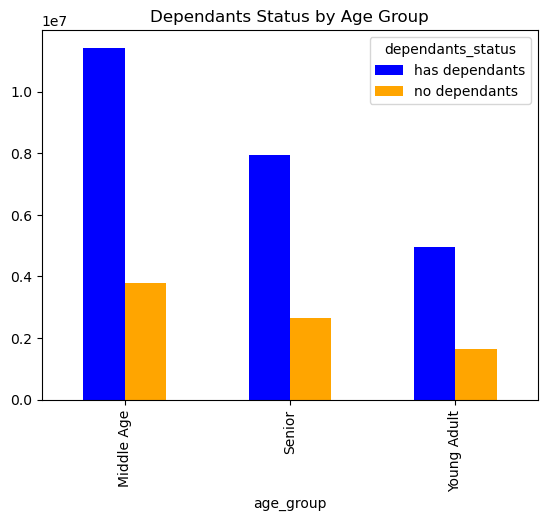

In [104]:
#create bar chart of crosstab
bar_dependants_by_age_group=dependants_by_age_group.plot.bar(color=['blue', 'orange'])
plt.title('Dependants Status by Age Group')

In [105]:
#Export dependants by age group bar chart
bar_dependants_by_age_group.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dependants_by_age_group_bar.png'))

In [106]:
#compare spending by region by creating crosstab
#create crosstab
spending_habits_by_region=pd.crosstab(df['region'], df['spending_flag'],dropna = False)

In [107]:
spending_habits_by_region

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40564,10751321
West,31223,8261690


Text(0.5, 1.0, 'Customer Spending Habits by Region')

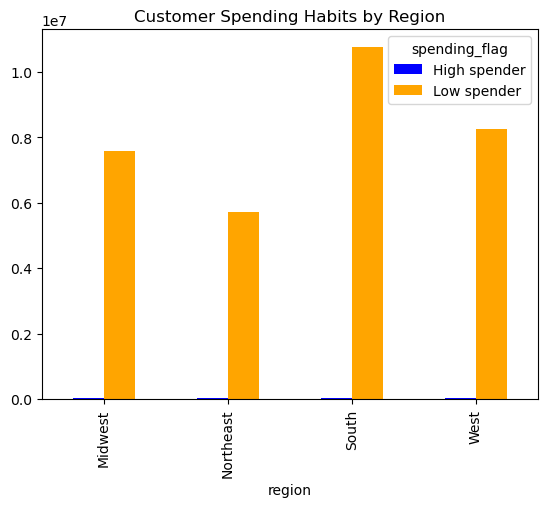

In [108]:
#create bar chart of crosstab
bar_spending_habits_by_region=spending_habits_by_region.plot.bar(color=['blue', 'orange'])
plt.title('Customer Spending Habits by Region')

In [109]:
#Export dependants by age group bar chart
bar_spending_habits_by_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','spending_habits_by_region_bar.png'))

In [110]:
#compare income level by region by creating crosstab
#create crosstab
income_level_by_region=pd.crosstab(df['region'], df['income_level'],dropna = False)

In [111]:
income_level_by_region

income_level,High Income,Low Income,Middle Income
region,,,
Midwest,1835777,1737985,4023563
Northeast,1367168,1317307,3038261
South,2546153,2532055,5713677
West,1964430,1933846,4394637


Text(0.5, 1.0, 'Income Levels by Region')

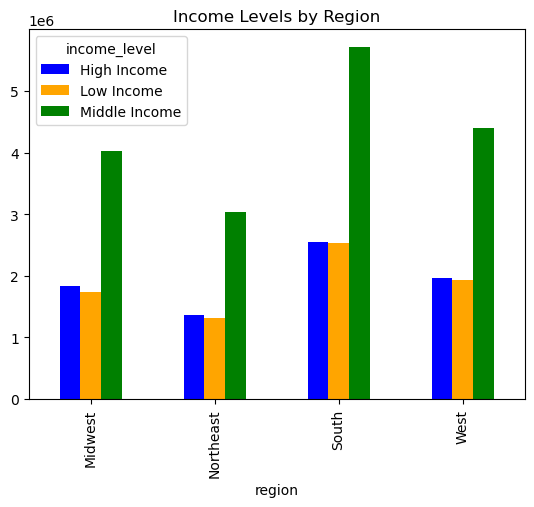

In [112]:
#create bar
bar_income_level_by_region=income_level_by_region.plot.bar(color=['blue', 'orange', 'green'])
plt.title('Income Levels by Region')

In [113]:
#Export 
bar_income_level_by_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_level_by_region_bar.png'))

In [114]:
#compare dependants by region by creating crosstab
#create crosstab
dependants_by_region_crosstab=pd.crosstab(df['region'], df['dependants_status'],dropna = False)

In [115]:
#print crosstab
dependants_by_region_crosstab

dependants_status,has dependants,no dependants
region,,
Midwest,5692125,1905200
Northeast,4304435,1418301
South,8090226,2701659
West,6220570,2072343


Text(0.5, 1.0, 'Dependants Status by Region')

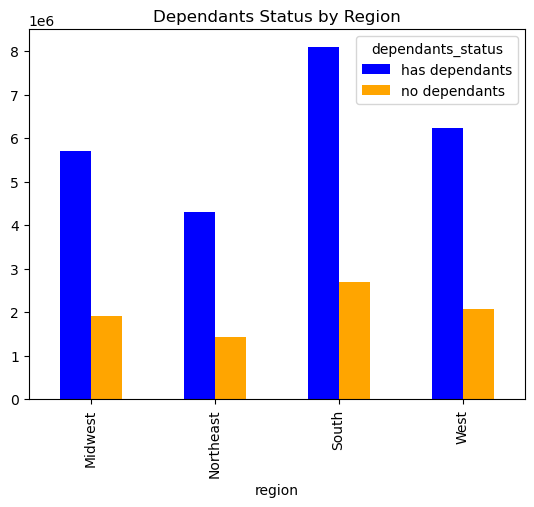

In [116]:
#create bar
bar_dependants_by_region=dependants_by_region_crosstab.plot.bar(color=['blue', 'orange', 'green','yellow'])
plt.title('Dependants Status by Region')

In [117]:
#Export 
bar_dependants_by_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dependants_by_region_bar.png'))

In [118]:
#compare departments by region by creating crosstab
#create crosstab
departments_by_region_crosstab=pd.crosstab(df['region'], df['department'],dropna = False)

In [119]:
#Print crosstab
departments_by_region_crosstab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,36186,98983,273869,625574,163551,8193,250702,1264223,245678,203769,...,175824,63736,166129,16535,8420,442101,105749,22355,2227937,673715
Northeast,26542,75139,208599,483418,123574,5802,186755,954026,186817,151816,...,131485,46891,124620,12374,6585,329445,78815,18601,1665839,514675
South,51624,143654,388815,898940,234251,11533,356015,1796969,349419,287444,...,243070,89142,235752,23193,12212,622436,150350,31269,3160551,957346
West,39344,106026,301145,680191,181657,9045,274586,1383529,269335,223598,...,188287,69484,182426,17043,9074,481387,112658,25491,2424964,741814


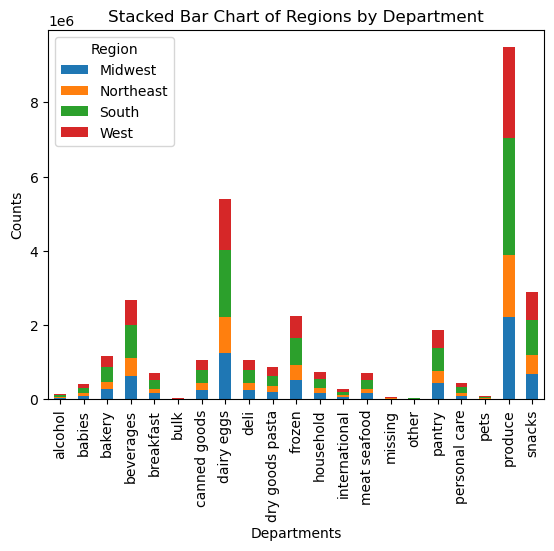

In [120]:
# Transpose the DataFrame to have regions as the columns (if necessary)
departments_by_region_crosstab = departments_by_region_crosstab.transpose()

departments_regions_stacked=departments_by_region_crosstab.plot(kind='bar', stacked=True)

plt.title('Stacked Bar Chart of Regions by Department')
plt.xlabel('Departments')
plt.ylabel('Counts')
plt.legend(title='Region')
plt.show()

In [121]:
#Export 
departments_regions_stacked.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','departments_by_region_stacked_bar.png'))

In [122]:
#Creating pet department profiling variable for 'pet_owner'

df['pet_owner'] = [1 if x == 'pets' else 0 for x in df['department']]
df['pet_owner'] = df.groupby(['user_id'])['pet_owner'].transform(np.max)

/var/folders/sl/t5s1mv992pz285_hqs7tzfh80000gr/T/ipykernel_81631/3121063519.py:4: FutureWarning: The provided callable <function max at 0x109433a60> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['pet_owner'] = df.groupby(['user_id'])['pet_owner'].transform(np.max)


In [123]:
#Check output
df['pet_owner'].value_counts(dropna = False)

pet_owner
0    28876718
1     3528141
Name: count, dtype: int64

In [124]:
#compare pet_owners by region
#create crosstab
pet_owner_region_crosstab=pd.crosstab(df['pet_owner'], df['region'],dropna = False)

In [125]:
#print crosstab
pet_owner_region_crosstab

region,Midwest,Northeast,South,West
pet_owner,,,,
0,6752777,5110297,9650143,7363501
1,844548,612439,1141742,929412


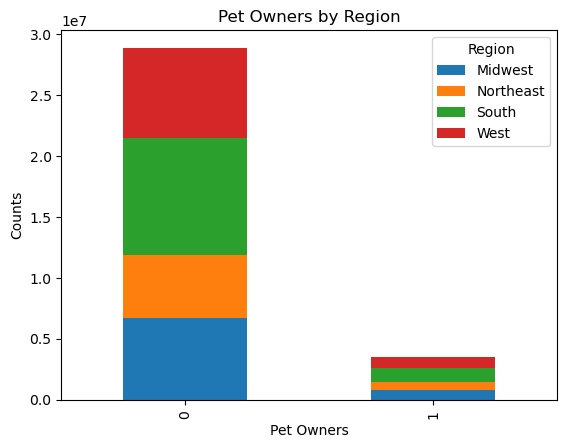

In [126]:
pet_owners_by_region_stacked=pet_owner_region_crosstab.plot(kind='bar', stacked=True)

plt.title('Pet Owners by Region')
plt.xlabel('Pet Owners')
plt.ylabel('Counts')
plt.legend(title='Region')
plt.show()

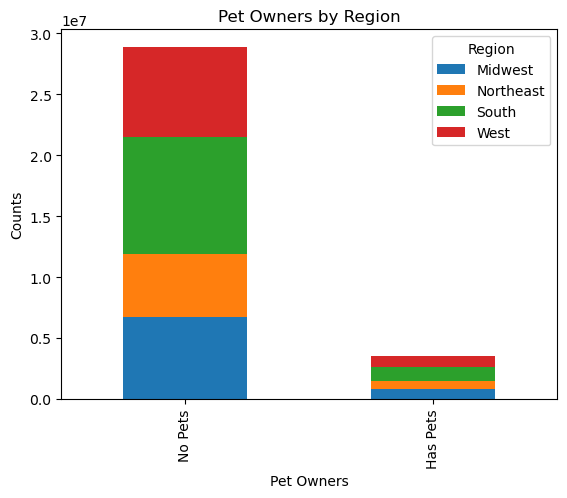

In [127]:
#Updating labels in chart
pet_owner_region_crosstab.rename(index={0: 'No Pets', 1: 'Has Pets'}, inplace=True)

# Plotting the stacked bar chart
pet_owners_by_region_stacked = pet_owner_region_crosstab.plot(kind='bar', stacked=True)

# Adding title and labels
plt.title('Pet Owners by Region')
plt.xlabel('Pet Owners')
plt.ylabel('Counts')
plt.legend(title='Region')

# Display the plot
plt.show()

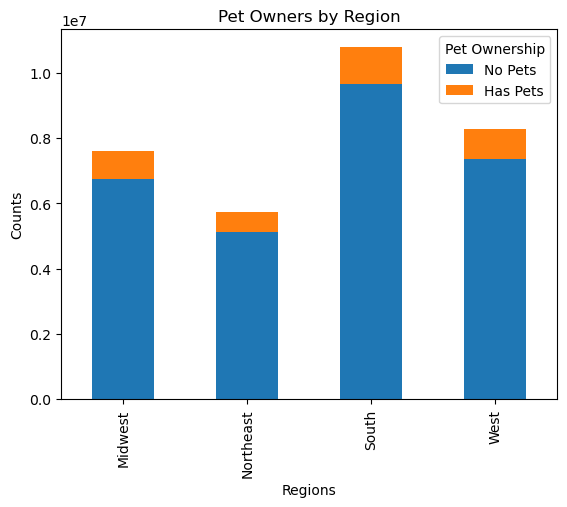

In [128]:
#Switching variables on x and y axis for better readability
pet_owner_region_crosstab = pet_owner_region_crosstab.transpose()

# Rename the columns to 'No Pets' and 'Has Pets'
pet_owner_region_crosstab.columns = ['No Pets', 'Has Pets']

# Plotting the stacked bar chart with regions on the X-axis
pet_owner_by_region_stacked = pet_owner_region_crosstab.plot(kind='bar', stacked=True)

# Adding title and labels
plt.title('Pet Owners by Region')
plt.xlabel('Regions')
plt.ylabel('Counts')
plt.legend(title='Pet Ownership')

In [129]:
#Export 
pet_owner_by_region_stacked.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','pet_owner_by_region_stacked.png'))

In [130]:
#Creating babies department profiling variable for 'parent_of_baby'

df['parent_of_baby'] = [1 if x == 'babies' else 0 for x in df['department']]
df['parent_of_baby'] = df.groupby(['user_id'])['parent_of_baby'].transform(np.max)

/var/folders/sl/t5s1mv992pz285_hqs7tzfh80000gr/T/ipykernel_81631/1540395625.py:4: FutureWarning: The provided callable <function max at 0x109433a60> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['parent_of_baby'] = df.groupby(['user_id'])['parent_of_baby'].transform(np.max)


In [131]:
#check output
df['parent_of_baby'].value_counts(dropna=False)

parent_of_baby
0    22431550
1     9973309
Name: count, dtype: int64

In [132]:
#compare parents by region
#create crosstab
parents_by_region_crosstab=pd.crosstab(df['region'], df['parent_of_baby'],dropna = False)

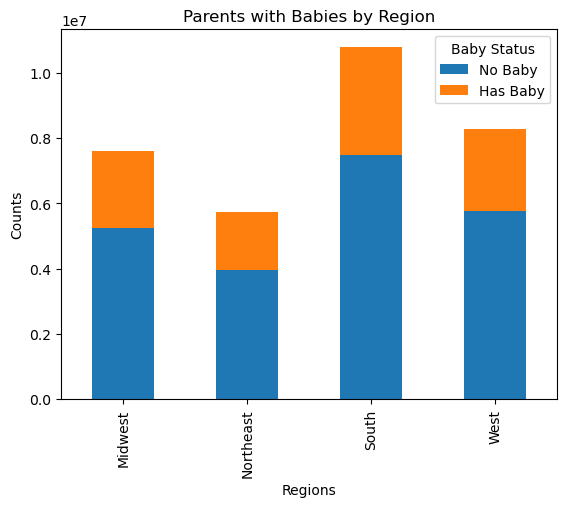

In [133]:
#Create bar chart
parents_by_region_crosstab.columns = ['No Baby', 'Has Baby']

# Plotting the stacked bar chart with regions on the X-axis
parent_of_baby_region_bar = parents_by_region_crosstab.plot(kind='bar', stacked=True)

# Adding title and labels
plt.title('Parents with Babies by Region')
plt.xlabel('Regions')
plt.ylabel('Counts')
plt.legend(title='Baby Status')

In [134]:
#Export 
parent_of_baby_region_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','parents_with_baby_by_region_stacked.png'))

In [135]:
# Get counts for each unique item in the 'region' column
df['marital_status'].value_counts()

marital_status
married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: count, dtype: int64

In [136]:
#compare marital status by region
#create crosstab
marital_status_by_region_crosstab=pd.crosstab(df['region'], df['marital_status'],dropna = False)

In [137]:
marital_status_by_region_crosstab

marital_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Midwest,646401,366517,5325608,1258799
Northeast,501059,268114,4036321,917242
South,920849,529584,7560642,1780810
West,703503,386388,5834182,1368840


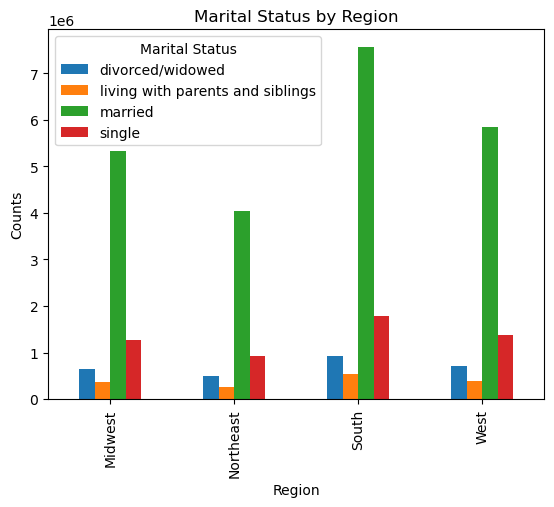

In [138]:
#Plotting the bar chart
marital_status_region_bar = marital_status_by_region_crosstab.plot(kind='bar')

#Adding title and labels
plt.title('Marital Status by Region')
plt.xlabel('Region')
plt.ylabel('Counts')
plt.legend(title='Marital Status')

In [139]:
#Export 
marital_status_region_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','marital_status_by_region_bar.png'))

In [140]:
#Customer Profiling based on specific departments

def is_purchasing_certain_goods(department):
    certain_goods_departments = ['produce', 'dairy_eggs', 'snacks', 'beverages', 'frozen', 'babies', 'pets', 'household', 'personal_care']
    return 'Purchases' if department in certain_goods_departments else 'No Purchases'

def determine_dependents_group(dependants_status):
    return 'Single Parent' if dependants_status >= 1 else 'No Dependents'

def determine_shopping_time(order_day_of_week, order_hour_of_day):
    if order_day_of_week < 5 and (order_hour_of_day >= 9 and order_hour_of_day < 17):
        return 'Weekday Shopper'
    else:
        return 'Weekend/Evening Shopper'

In [141]:
# Apply functions to create new columns

df['goods_category'] = df['department'].apply(is_purchasing_certain_goods)

df['shopping_time_category'] = df.apply(lambda row: determine_shopping_time(row['order_day_of_week'], row['order_hour_of_day']), axis=1)

# Combine into a profiling variable
df['profile'] = df['age_group'] + ', ' + df['income_level'] + ', ' + df['goods_category'] + ', ' + df['dependants_status'] + ', ' + df['shopping_time_category']

# Print the first few rows to see the profile
print(df[['user_id', 'profile']].head())

   user_id                                            profile
0    26711  Middle Age, High Income, Purchases, has depend...
1    26711  Middle Age, High Income, Purchases, has depend...
2    26711  Middle Age, High Income, Purchases, has depend...
3    26711  Middle Age, High Income, Purchases, has depend...
4    26711  Middle Age, High Income, Purchases, has depend...


In [261]:
#Count unique combinations of user_id and profile
unique_combinations = df[['user_id', 'profile']].drop_duplicates().value_counts()
print(unique_combinations)

user_id  profile                                                                         
1        Middle Age, Low Income, No Purchases, has dependants, Weekday Shopper               1
137468   Middle Age, Low Income, Purchases, has dependants, Weekday Shopper                  1
137465   Middle Age, Middle Income, Purchases, no dependants, Weekend/Evening Shopper        1
137466   Senior, Middle Income, No Purchases, has dependants, Weekday Shopper                1
         Senior, Middle Income, No Purchases, has dependants, Weekend/Evening Shopper        1
                                                                                            ..
68709    Middle Age, Middle Income, No Purchases, has dependants, Weekend/Evening Shopper    1
         Middle Age, Middle Income, Purchases, has dependants, Weekday Shopper               1
         Middle Age, Middle Income, Purchases, has dependants, Weekend/Evening Shopper       1
68710    Senior, Middle Income, No Purchases, no depend

In [269]:
#Create a crosstab of profiles and regions
profile_region_crosstab = pd.crosstab(df['profile'], df['region'],dropna=False)

#Print the crosstab
print(profile_region_crosstab)

region                                              Midwest  Northeast  \
profile                                                                  
Middle Age, High Income, No Purchases, has depe...   139267     104147   
Middle Age, High Income, No Purchases, has depe...   157521     115763   
Middle Age, High Income, No Purchases, no depen...    47732      33014   
Middle Age, High Income, No Purchases, no depen...    54095      35870   
Middle Age, High Income, Purchases, has dependa...   177721     132946   
...                                                     ...        ...   
Young Adult, Middle Income, No Purchases, no de...    52254      36804   
Young Adult, Middle Income, Purchases, has depe...   173161     138499   
Young Adult, Middle Income, Purchases, has depe...   195371     152340   
Young Adult, Middle Income, Purchases, no depen...    57463      44411   
Young Adult, Middle Income, Purchases, no depen...    67208      48416   

region                               

### 12. Export Dataset

In [290]:
df.to_pickle(os.path.join(path, '02 Data', 'IC24 Prepared Data', 'instacart_full_data.pkl'))